# <center>Udacity Data Analyst Nanodegree </center>

# <center>Project: Investigate a Dataset - Analyze TMDb Movie Data</center>
#### Vasileios Garyfallos, March 2020

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## <center>Introduction</center>

### Dataset chosen for analysis: TMDb Movie Data

The dataset contains information about movies collected from The Movies Database, including revenue, budget, ratings etc.

### Questions posed:
  * How budgets, revenues, runtimes, costs per minute evolved over the years? What is the correlation between those metrics?


The following Python libraries were imported, in order to conduct the analysis and answer the questions:

In [1]:
import seaborn as sns; sns.set() #plot data
import numpy as np #create arrays
import pandas as pd #handle and wrangle data
import matplotlib.pyplot as plt #plot data


%matplotlib inline

<a id='wrangling'></a>
## <center>Data Wrangling</center>



### Dataset General Properties - Structure

After loading the dataset, I displayed 5 rows to get a little more detailed view about the columns, rows and  overall structure of the dataset:

In [2]:
# load tmdb-movies.csv file and show headers of the dataframe

df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Looking at the shape of the dataset:

Output = 10866 rows, 21 columns

In [3]:
df.shape

(10866, 21)

In order to understand the data a little bit more, I performed some basic summary statistics:

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## <center>Data Cleaning</center>

I examined whether the dataset has missing values, looked for any wrong datatypes and reduntant columns:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Output: 

The dataset has some missing values, which are non-numerical data (object) and need to be replaced before starting our analysis. Also 8 columns are irrelevant and will be dropped.

I decided to drop 8 columns, which are irrelevant for the intented analysis. This will make the dataset more consistent and its handling easier:

In [6]:
df = df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id', 'budget_adj', 'revenue_adj'], axis=1)

Columns dropped:
* cast 
* homepage 
* tagline
* keywords
* overview
* imdb id
* budget_adj
* revenue_adj

Checked results: The unnecessary 8 columns were dropped.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


I trimmed the dataset, replacing the empty values in 3 columns with the word 'nodata':

In [8]:
df['director'] = df['director'].fillna('nodata')
df['production_companies'] = df['production_companies'].fillna('nodata')
df['genres'] = df['genres'].fillna('nodata')

Checked results: The empty values were replaced with the word 'nodata'

In [9]:
df.query('director == "nodata"').head(5)
df.query('production_companies == "nodata"').head(5)
df.query('genres == "nodata"').head(5)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
424,363869,0.244648,0,0,Belli di papÃ,Guido Chiesa,100,nodata,nodata,10/29/15,21,6.1,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,nodata,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,nodata,nodata,10/3/14,13,6.8,2014
1712,21634,0.302095,0,0,Prayers for Bobby,Russell Mulcahy,88,nodata,Daniel Sladek Entertainment,2/27/09,57,7.4,2009
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,nodata,nodata,2/27/09,11,7.0,2009


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10866 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10866 non-null  object 
 8   production_companies  10866 non-null  object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


<a id='eda'></a>
## <center>Exploratory Data Analysis</center>


### Question 1: How budgets, revenues, runtimes, costs per minute evolved over the years? What is the correlation between those metrics?


To answer this question for each metric, I will first group and plot the data , in order to gain insight and understand it better.

In [11]:
# Grouping the data by release year and summing its attributes
df.groupby('release_year').sum()

,id,popularity,budget,revenue,runtime,vote_count,vote_average
release_year,,,,,,,
1960,502889,14.685834,22056948,145005000,3541,2481,202.4
1961,578367,13.107641,46137000,337720188,3702,2405,197.6
1962,544034,14.553069,54722126,215579846,3979,2392,203.0
1963,562904,17.092019,73331500,187404989,3785,2816,215.2
1964,729942,17.321989,39483161,340981782,4587,3137,260.9
1965,614765,11.990529,70205115,458081854,4136,1820,216.8
1966,759644,13.989152,57554800,84736689,4917,1460,281.9
1967,697188,18.846147,100652200,737834637,4198,3102,249.7
1968,726515,18.883866,71939000,264732980,4184,4217,248.8


A first glimpse gives the intuition that the numbers have changed a lot over time with an upward trend. Is this the case? 

I will create charts with the two variables (revenue, budget), in order to have a view of the two trends and examine the correlation.

Text(0, 0.5, 'Revenue')

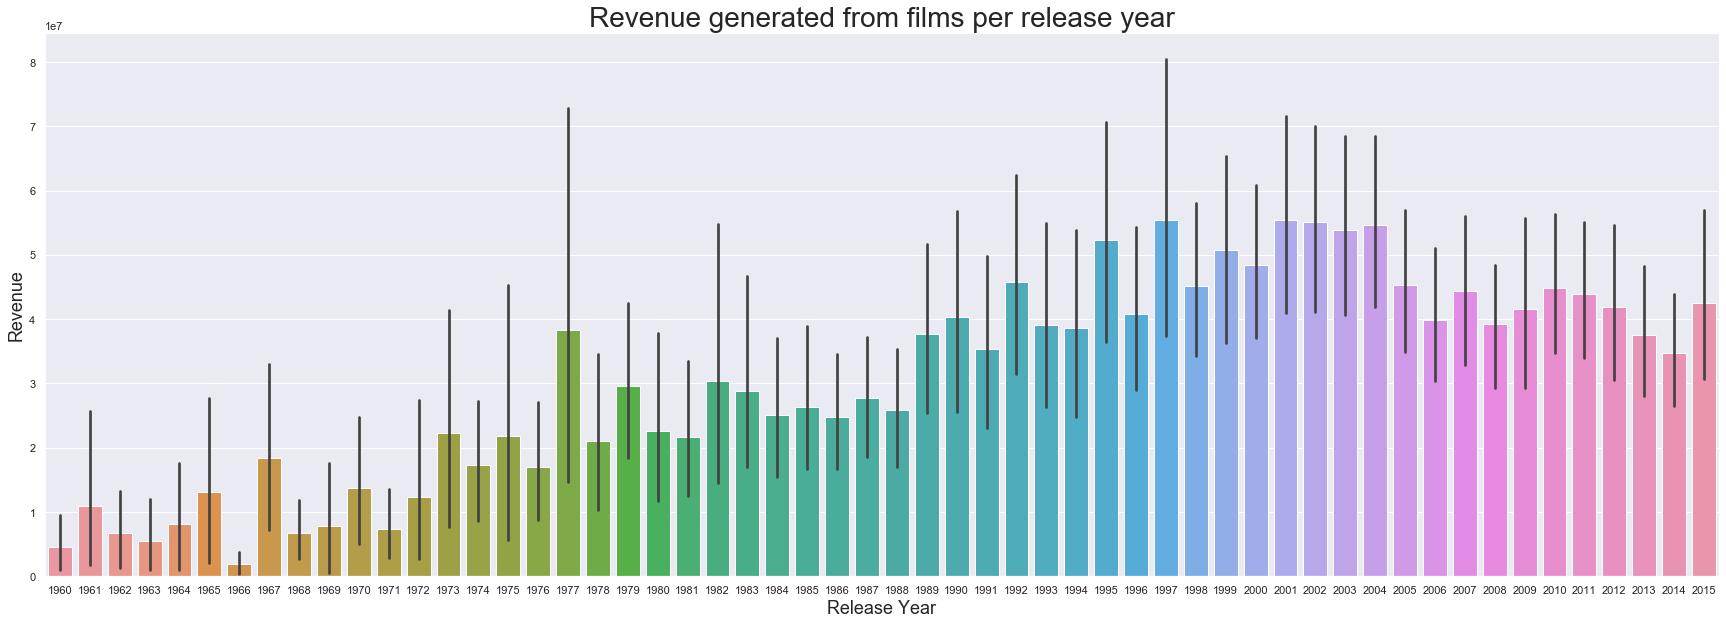

In [12]:
ax = plt.subplots(figsize=(30, 10))
sns.barplot(x='release_year', y='revenue', data=df);
plt.title('Revenue generated from films per release year', fontsize=28)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Revenue', fontsize=18)

Text(0, 0.5, 'Budget')

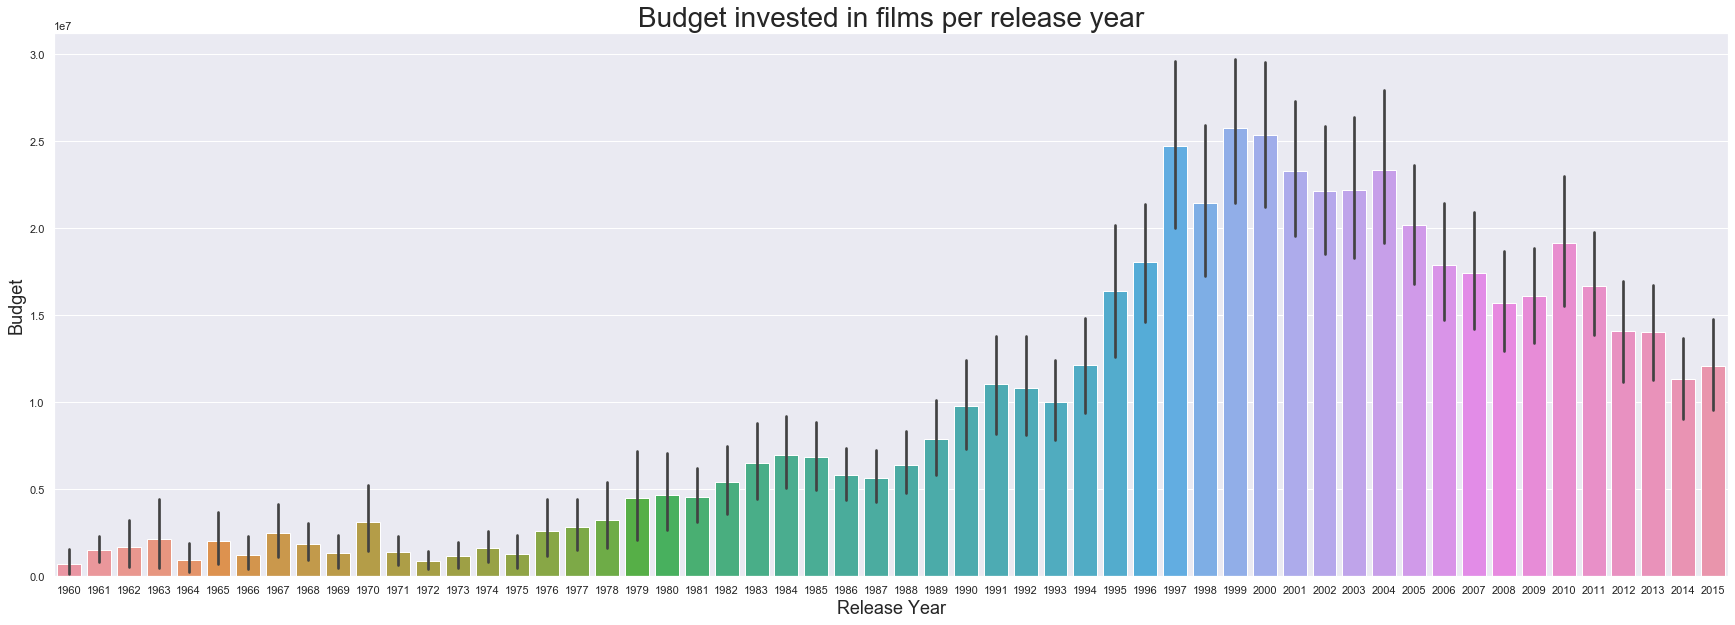

In [13]:
ax = plt.subplots(figsize=(30, 10))
sns.barplot(x='release_year', y='budget', data=df);
plt.title('Budget invested in films per release year', fontsize=28)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Budget', fontsize=18)

Text(0, 0.5, 'Revenue')

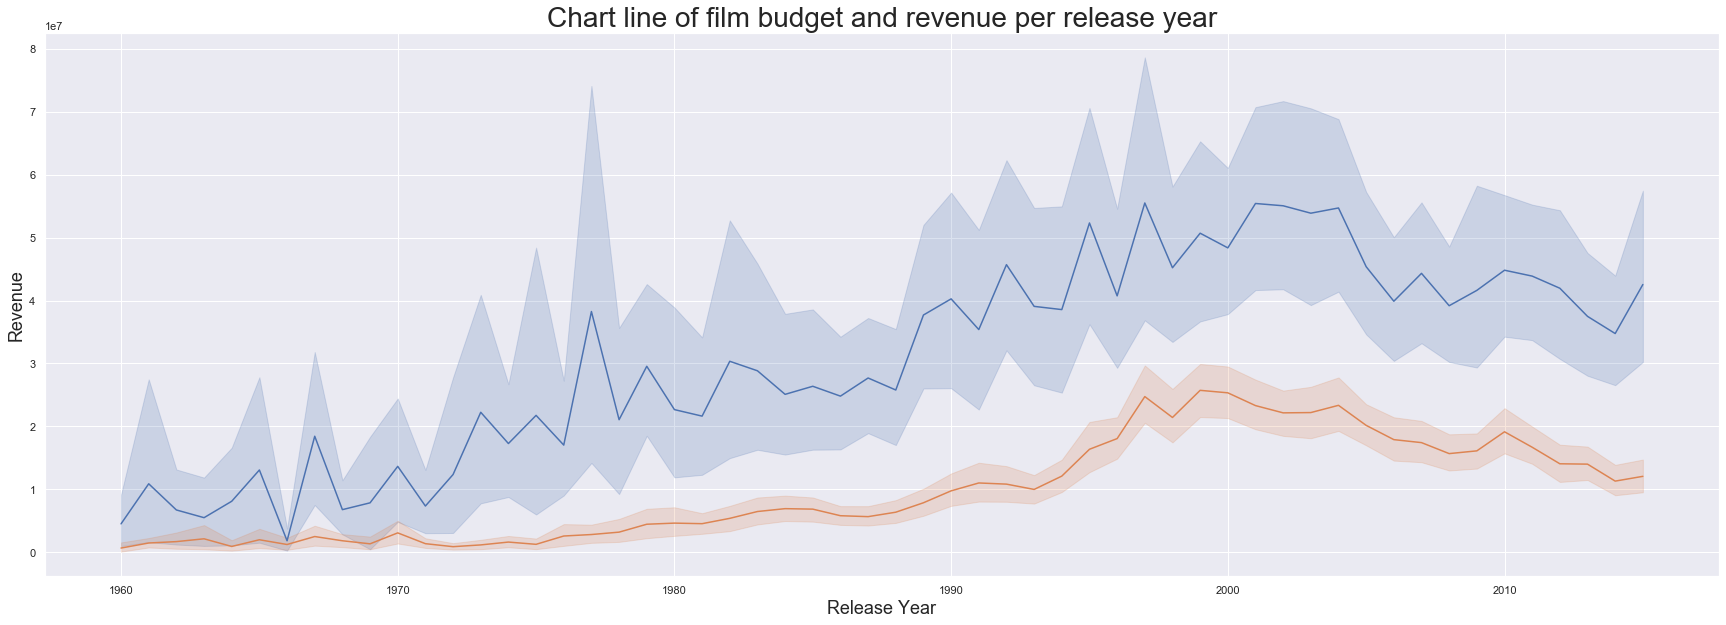

In [14]:
ax = plt.subplots(figsize=(30, 10))
sns.lineplot(x='release_year', y='revenue', data=df);
sns.lineplot(x='release_year', y='budget', data=df);
plt.title('Chart line of film budget and revenue per release year', fontsize=28)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Revenue', fontsize=18)

It seems that the two variables follow identical trends, especially after 1990. The higher the budget for a movie is, the higher are the revenues that generates.

I also examined the correlation coefficient R between these two variables:

In [15]:
df['revenue'].corr(df['budget'])

0.7349006819076118

With a value of 0,74 there is a strong correlation between the two variables, which confirms my first conclusion.

What about the runtime of the movies over the years? 

This will give helpful insight regarding whether there's a correlation between the budget of a movie and its duration:

In [16]:
df.groupby('release_year').sum()

,id,popularity,budget,revenue,runtime,vote_count,vote_average
release_year,,,,,,,
1960,502889,14.685834,22056948,145005000,3541,2481,202.4
1961,578367,13.107641,46137000,337720188,3702,2405,197.6
1962,544034,14.553069,54722126,215579846,3979,2392,203.0
1963,562904,17.092019,73331500,187404989,3785,2816,215.2
1964,729942,17.321989,39483161,340981782,4587,3137,260.9
1965,614765,11.990529,70205115,458081854,4136,1820,216.8
1966,759644,13.989152,57554800,84736689,4917,1460,281.9
1967,697188,18.846147,100652200,737834637,4198,3102,249.7
1968,726515,18.883866,71939000,264732980,4184,4217,248.8


Text(0, 0.5, 'Runtime')

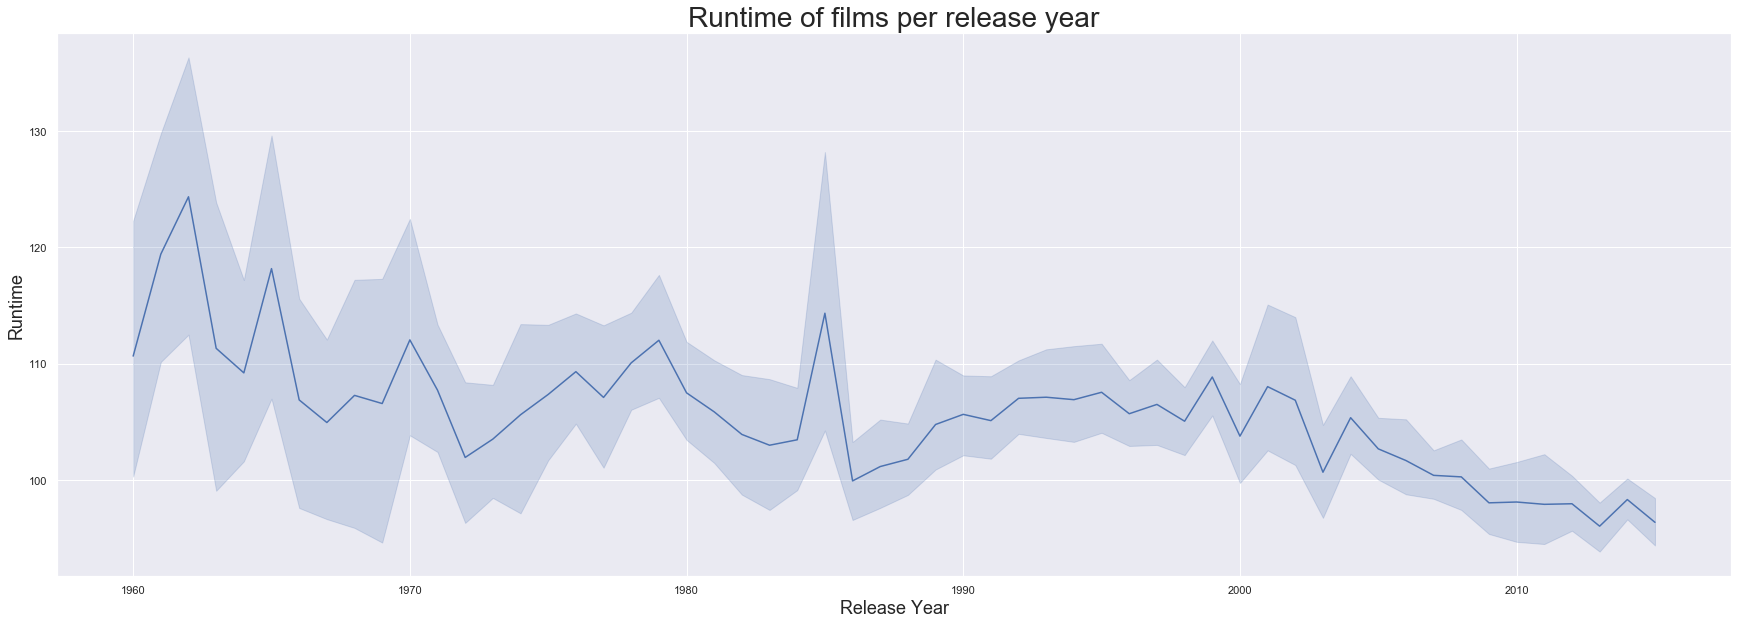

In [17]:
ax = plt.subplots(figsize=(30, 10))
sns.lineplot(y="runtime", x="release_year", data=df, color='b');
plt.title('Runtime of films per release year', fontsize=28)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Runtime', fontsize=18)

The plot shows a decreasing tendency for the decade 1960 - 1970. 

From that point and until the mid 90's we can see an increase of the movies' runtimes, only to reach mid 60's levels and, since then, the tendency is steadily decreasing.

This is opposite to the tendency of the movies' budgets over the years, which have seen a steady increase since the beginning of the examined timeline.

I also examined the correlation coefficient R between these two variables:

In [18]:
df['runtime'].corr(df['budget'])

0.19128265656578047

With a value of 0,19 there is a weak or no correlation between the two variables, which confirms my first conclusion.

There's another one metric, which needs to be examined: The distribution (N) of the films' runtimes. This will give useful info about the standard trend of filmaking regarding the runtime attribute. I created a histogram to examine it:

(0, 200)

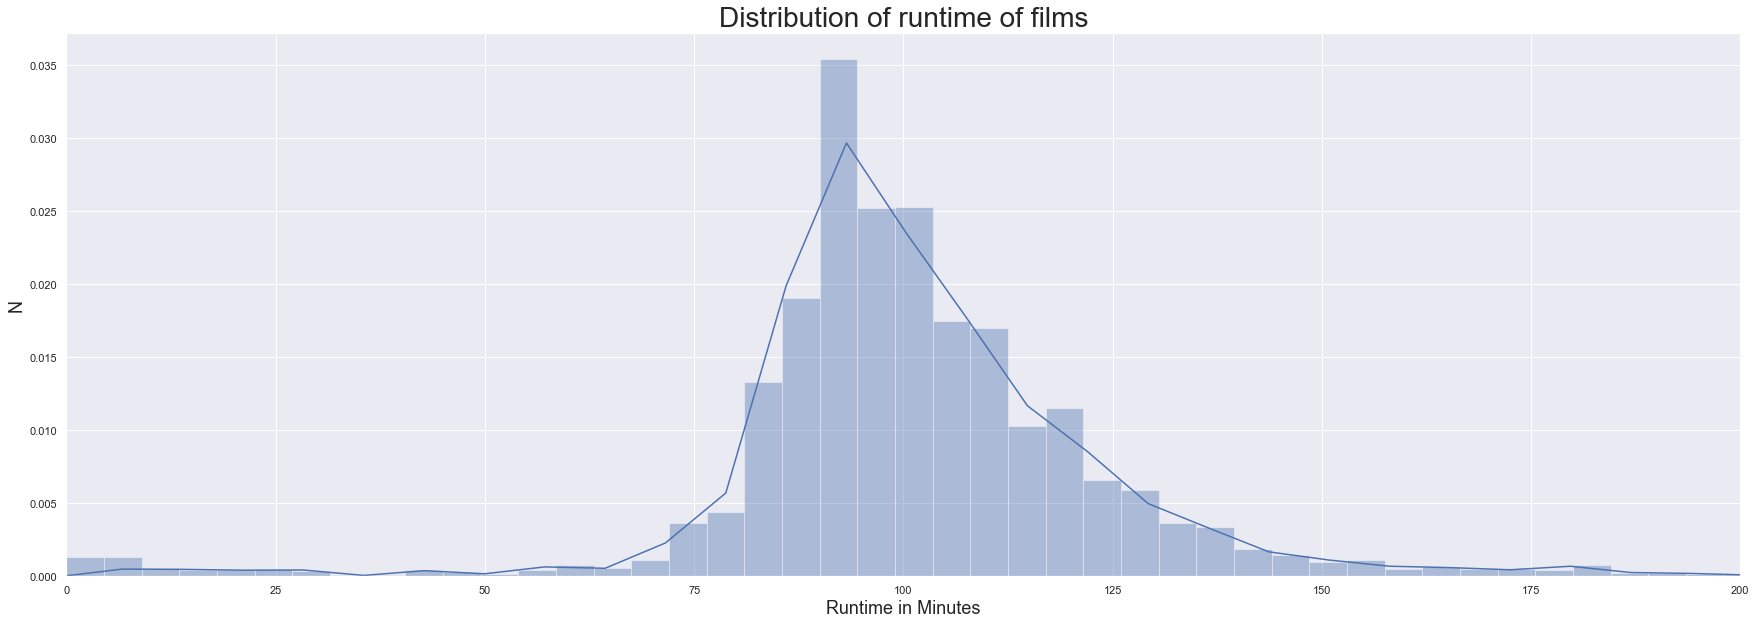

In [19]:
ax = plt.subplots(figsize=(30, 10))
sns.distplot(df['runtime'], bins=200)
plt.title('Distribution of runtime of films', fontsize=28)
plt.xlabel('Runtime in Minutes',fontsize=18)
plt.ylabel('N',fontsize=18)
plt.xlim(xmin=0, xmax = 200)

The histogram shows that the films with a runtime of 95 minutes are the most frequent in the population.

I also examined the tendency for another important metric: Cost per minute (cpm). To do so, I created a new, derived column, which gives the result of budget/runtime:

In [20]:
df['cpm'] = df['budget']/df['runtime']
df


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,cpm
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.209677e+06
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.250000e+06
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,9.243697e+05
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.470588e+06
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.386861e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


Text(0, 0.5, 'CPM')

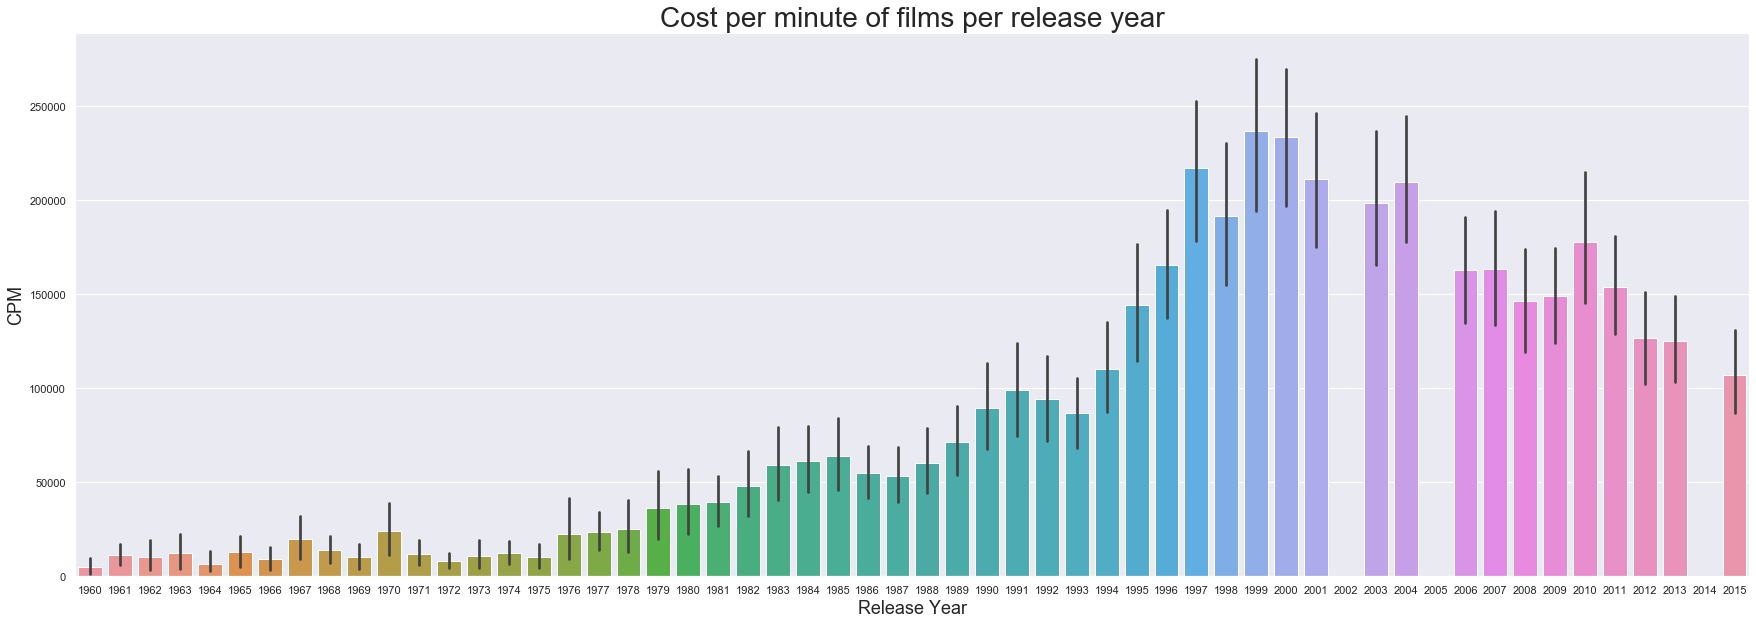

In [21]:
ax = plt.subplots(figsize=(30, 10))

sns.barplot(x='release_year', y='cpm', data=df);
plt.title('Cost per minute of films per release year', fontsize=28)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('CPM', fontsize=18)

The bar plot shows increasing tendency for the costs per minute from 1960 until 1999. From that point the CPM of the movies are steadily decreasing.

<a id='conclusions'></a>
## <center>Conclusions</center>


1. The research question "How budgets, revenues, runtimes, costs per minute evolved over the years? What is the correlation between those metrics?" has shown as results that **budgets and revenues have steadily increased over time** with a strong correlation. It seems that nowadays we have overall more costly movies that generate higher revenues.

2. The runtime of the movies has seen a **steady decrease over the examined timeline**. In the recent decades the movies have been shorter with a tendency for a runtime of 95 minutes.

3. The metric **Costs per minute has seen a steady increase until the year 1999** and since then the costs are decreasing. This is in accordance with the other two metrics (budget, runtime) and all three variables have identical tendencies.

**All results are limited to the underlying dataset and since no advanced statistics were performed, the results can only be treated as indicators and are not generalizable. Furthermore, one has to consider that many entries in the dataset have been removed due to missing data**